In [71]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [72]:
tf.reset_default_graph()

In [73]:
x0, x1 = 10, 20 
test_data_size = 2000
iterations = 10000
learn_rate = 0.01
hiddenSize = 10

In [74]:
def generate_test_values():
    train_x = []
    train_y = []

    for _ in range(test_data_size):
        x = x0+(x1-x0)*np.random.rand()
        y = math.sin(x)
        train_x.append([x])
        train_y.append([y])

    return np.array(train_x), np.array(train_y)

In [75]:
x = tf.placeholder(tf.float32, [None, 1], name="x")
y = tf.placeholder(tf.float32, [None, 1], name="y")
nn = tf.layers.dense(x, hiddenSize,
                     activation=tf.nn.sigmoid,
                     kernel_initializer=tf.initializers.ones(),
                     bias_initializer=tf.initializers.random_uniform(minval=-x1, maxval=-x0),
                     name="hidden")
model = tf.layers.dense(nn, 1,
                        activation=None,
                        name="output")
cost = tf.losses.mean_squared_error(y, model)
train = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)
init = tf.initializers.global_variables()

/tmp/ipykernel_6410/338250720.py:3: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  nn = tf.layers.dense(x, hiddenSize,
/tmp/ipykernel_6410/338250720.py:8: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  model = tf.layers.dense(nn, 1,


cost = 0.19664950668811798
cost = 0.1318155974149704
cost = 0.09018819034099579
cost = 0.06435474753379822
cost = 0.04735641926527023
cost = 0.03576810285449028
cost = 0.02769644558429718
cost = 0.021522795781493187
cost = 0.015860911458730698
cost = 0.012179294601082802


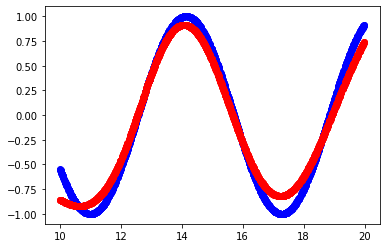

hidden:
kernel= [[1.0251918  1.0327493  1.1848817  1.108832   0.6283084  1.3240097
  1.1824279  0.77118653 0.67060095 0.6061889 ]]
bias =  [-19.243618 -16.02032  -11.558356 -10.213897 -18.372562 -16.902632
 -18.439909 -19.963558 -19.911842 -18.684355]
output:
kernel= [[ 3.3923442 ]
 [-1.9835836 ]
 [-0.61981565]
 [-0.4778273 ]
 [-0.21423662]
 [ 3.3683856 ]
 [-1.9760865 ]
 [-0.03041484]
 [-0.4228105 ]
 [-0.4666893 ]]
bias =  [-0.2376807]


In [76]:
with tf.Session() as session:
    session.run(init)

    for _ in range(iterations):

        train_dataset, train_values = generate_test_values()

        session.run(train, feed_dict={
            x: train_dataset,
            y: train_values
        })

        if(_ % 1000 == 999):
            print("cost = {}".format(session.run(cost, feed_dict={
                x: train_dataset,
                y: train_values
            })))

    train_dataset, train_values = generate_test_values()

    train_values1 = session.run(model, feed_dict={
        x: train_dataset,
    })

    plt.plot(train_dataset, train_values, "bo",
             train_dataset, train_values1, "ro")
    plt.show()

    with tf.variable_scope("hidden", reuse=True):
        w = tf.get_variable("kernel")
        b = tf.get_variable("bias")
        print("hidden:")
        print("kernel=", w.eval())
        print("bias = ", b.eval())

    with tf.variable_scope("output", reuse=True):
        w = tf.get_variable("kernel")
        b = tf.get_variable("bias")
        print("output:")
        print("kernel=", w.eval())
        print("bias = ", b.eval())